In [3]:
pip install -U imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


# DEFAULT OF CREDIT CARD
BY - MANASA, DARIEN

###### From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients. Because the real probability of default is unknown, this study presented the novel â€œSorting Smoothing Methodâ€ to estimate the real probability of default. With the real probability of default as the response variable (Y), and the predictive probability of default as the independent variable (X), the simple linear regression result (Y = A + BX) shows that the forecasting model produced by artificial neural network has the highest coefficient of determination; its regression intercept (A) is close to zero, and regression coefficient (B) to one.

# QUESTION 1


#### Data Preprocessing: Read the excel file into the jupyter notebook and clean the data as needed. Split the data into training (80%) and test (20%) datasets. 

##### Implementing the Data

In [4]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [5]:
# change directory (to read data)

cwd = os.getcwd()
print(cwd)

os.chdir('\\Users\91958\Documents\Data and programming_651')

print(cwd)

C:\Users\91958\Documents\Data and programming_651\Final Project 651
C:\Users\91958\Documents\Data and programming_651\Final Project 651


In [6]:
# Load data

df = pd.DataFrame(pd.read_excel("defaultofcredcard.xls", header = 1))

In [7]:
# Printing out the first 5 rows of the dataframe

print (df.head())

   ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1      20000    2          2         1   24      2      2     -1     -1   
1   2     120000    2          2         2   26     -1      2      0      0   
2   3      90000    2          2         2   34      0      0      0      0   
3   4      50000    2          2         1   37      0      0      0      0   
4   5      50000    1          2         1   57     -1      0     -1      0   

   ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0  ...          0          0          0         0       689         0   
1  ...       3272       3455       3261         0      1000      1000   
2  ...      14331      14948      15549      1518      1500      1000   
3  ...      28314      28959      29547      2000      2019      1200   
4  ...      20940      19146      19131      2000     36681     10000   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  default payment next month  
0         0         0   

In [8]:
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [9]:
# Check for duplicates

sum(df.duplicated())

0

In [10]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

#### Data Cleaning

In [11]:
df['default payment next month'].value_counts()

0    23364
1     6636
Name: default payment next month, dtype: int64

In [12]:
# Create dependent and independent features

x = df.iloc[:,:-1].values
y= df.iloc[:,-1].values
y
x

array([[     1,  20000,      2, ...,      0,      0,      0],
       [     2, 120000,      2, ...,   1000,      0,   2000],
       [     3,  90000,      2, ...,   1000,   1000,   5000],
       ...,
       [ 29998,  30000,      1, ...,   4200,   2000,   3100],
       [ 29999,  80000,      1, ...,   1926,  52964,   1804],
       [ 30000,  50000,      1, ...,   1000,   1000,   1000]], dtype=int64)

<AxesSubplot:xlabel='default payment next month', ylabel='count'>

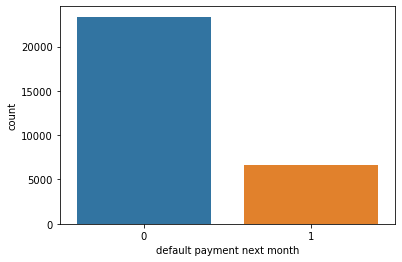

In [13]:
sns.countplot(df['default payment next month'])

#### Checking for correlation

In [14]:
# Looking for correlation

cor = ['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

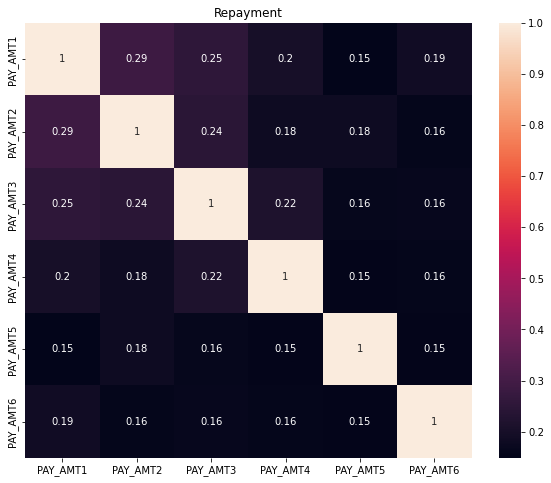

In [15]:
plt.figure(figsize = (10,8))
plt.title("Repayment")
sns.heatmap(df[cor].corr(), annot = True)
plt.show()

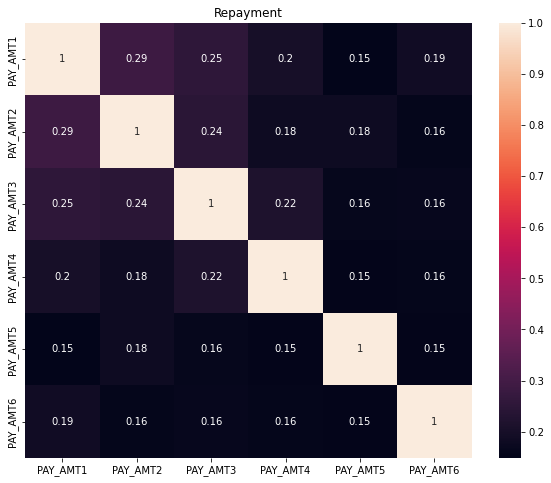

In [16]:
cor1 = ['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
plt.figure(figsize=(10,8))
plt.title("Repayment")
sns.heatmap(df[cor1].corr(), annot = True)
plt.show()

In [17]:
X = df.drop('default payment next month', axis = 1)
y = df['default payment next month']

In [18]:
# create a train n test it
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, train_size = 0.8, random_state = 100)

In [19]:
print('Class counts in y:', np.bincount(y)/len(y))
print('Class counts in y_train:', np.bincount(y_train)/len(y_train))
print('Class counts in y_test:', np.bincount(y_test)/len(y_test)) 

Class counts in y: [0.7788 0.2212]
Class counts in y_train: [0.78079167 0.21920833]
Class counts in y_test: [0.77083333 0.22916667]


#### ScatterPlot for relation b/w ID and Default payment next month

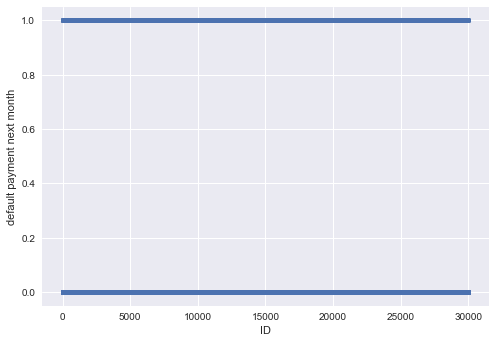

In [20]:
# scatterplot 
 
plt.style.use('seaborn')

df.plot(x='ID', y='default payment next month', kind='scatter')
plt.show()

# QUESTION 2

#### Use all features to fit a classification tree. Set the minimum number of records in a terminal node to 40 and the maximum tree depth to 8 in order to combat overfitting. Give a rule-based explanation of the outcomes (Explain using the hierarchy of the variables).

In [21]:
# standardizing
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train) # calculate parameters

X_train_sd = sc.transform(X_train) # transforming to X_train
X_test_std = sc.transform(X_test) # transforming to X_test

##### standardize a dataset means to scale all of the values in the dataset such that the mean value is 0 and the standard deviation is 1.

In [22]:
from sklearn.tree import DecisionTreeClassifier # we dont need regressor here cus o/p variable is not continuous but categorical
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
tree_model = DecisionTreeClassifier(criterion = 'gini',
                                    max_depth = 8,
                                    min_samples_split = 40)
tree_model.fit(X_train.values, y_train.values)

DecisionTreeClassifier(max_depth=8, min_samples_split=40)

###### This means that they use prelabelled data in order to train an algorithm that can be used to make a prediction. Decision trees can also be used for regression problems. 

In [23]:
y_pred = tree_model.predict(X_test.values)

###### A decision tree model can be used to visually represent the “decisions”, or if-then rules, that are used to generate predictions.

In [24]:
print('Classification report:\n', classification_report(y_test, y_pred))
print('Accuracy: {0:0.2f}' .format(accuracy_score(y_test, y_pred)))

Classification report:
               precision    recall  f1-score   support

           0       0.83      0.95      0.89      4625
           1       0.68      0.36      0.48      1375

    accuracy                           0.82      6000
   macro avg       0.76      0.66      0.68      6000
weighted avg       0.80      0.82      0.79      6000

Accuracy: 0.82


In [25]:
# Fit a regression examining the relationship 

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [26]:
# Determine the model coefficients (i.e., slope and coefficient)

m = regressor.coef_
print(m)
b = regressor.intercept_
print(b)

[-1.30222267e-07 -9.68243068e-08 -1.18083957e-02 -1.31669884e-02
 -2.32327335e-02  1.47817700e-03  9.59538327e-02  1.64401696e-02
  1.33653834e-02  1.09793900e-03  4.65405429e-03  2.09097142e-03
 -5.79529041e-07  1.72277171e-07 -1.55622920e-08 -3.61652656e-08
 -1.72231419e-08  8.00945793e-08 -7.60467301e-07 -1.60775175e-07
  5.02109030e-08 -2.02169986e-07 -3.15948553e-07 -5.04939362e-08]
0.3020098385608806


In [27]:
# Report the Coefficient of Determination

from sklearn.metrics import mean_squared_error, r2_score

print("Coefficient of Determination: %.2f" %r2_score(y_test, y_pred)) 

Coefficient of Determination: -0.04


In [28]:
# Use the coefficients from regression to predict 

y = m*10.3 + b
print(y)

[0.3020085  0.30200884 0.18038336 0.16638986 0.06271268 0.31723506
 1.29033432 0.47134359 0.43967329 0.31331861 0.3499466  0.32354684
 0.30200387 0.30201161 0.30200968 0.30200947 0.30200966 0.30201066
 0.30200201 0.30200818 0.30201036 0.30200776 0.30200658 0.30200932]


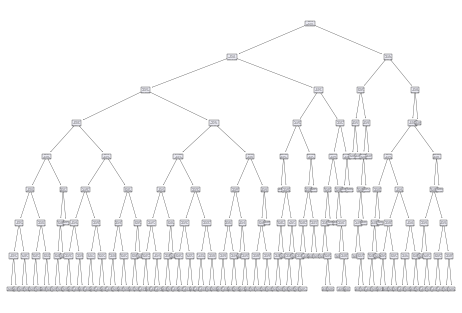

In [29]:
from sklearn import tree
tree.plot_tree(tree_model)
plt.show()

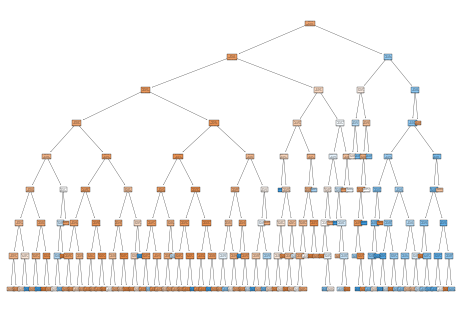

In [30]:
tree.plot_tree(tree_model, filled = True)
plt.show()

#### The above diagram is the hirearchy of the tree model with minimum samples of 40

# QUESTION 3

#### Fit a different classification tree with a minimum of 100 data per terminal node and a maximum of 8 depths. Give a rule-based description of the generated tree. Is there a difference from the first tree?

In [37]:
tree_model2 = DecisionTreeClassifier(max_depth = 8, min_samples_split = 100)
tree_model2 = tree_model2.fit(X_train.values, y_train.values)
y_pred = tree_model2.predict(X_test.values)

In [38]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
print(classification_report(y_test, y_pred))
print('Accuracy: {0:0.2f}'.format(accuracy_score(y_test, y_pred)))

              precision    recall  f1-score   support

           0       0.83      0.95      0.89      4625
           1       0.68      0.37      0.48      1375

    accuracy                           0.82      6000
   macro avg       0.76      0.66      0.68      6000
weighted avg       0.80      0.82      0.79      6000

Accuracy: 0.82


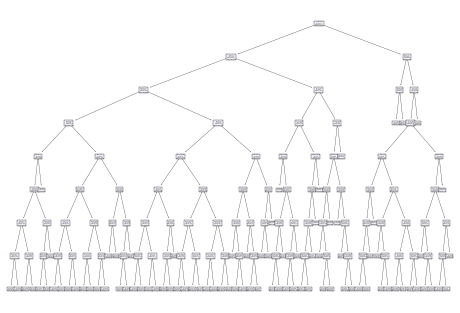

In [39]:
# from sklearn import tree
tree.plot_tree(tree_model2)
plt.show()

#### The above diagram is the hirearchy of the tree model with minimum samples of 100.

#### There is a difference from the first tree with 40 samples and for the second tree with 100 samples. 

# QUESTION 4

#### Compare the findings from various impurity measurements (Gini, Entropy and Classification Error)

### Using Entropy impurity:

In [57]:
treemodel = DecisionTreeClassifier(criterion = "entropy")
treemodel = treemodel.fit(X_train.values, y_train.values)
y_pred = treemodel.predict(X_test.values)
print('Accuracy: {0:0.2f}\n'.format(accuracy_score(y_test, y_pred)))
print('Classification report:\n', classification_report(y_test, y_pred))
print('Confusion matrix:\n', confusion_matrix(y_test, y_pred))

Accuracy: 0.74

Classification report:
               precision    recall  f1-score   support

           0       0.83      0.83      0.83      4625
           1       0.43      0.42      0.43      1375

    accuracy                           0.74      6000
   macro avg       0.63      0.63      0.63      6000
weighted avg       0.74      0.74      0.74      6000

Confusion matrix:
 [[3853  772]
 [ 794  581]]


### Using gini index:

In [58]:
treemodel2 = DecisionTreeClassifier(criterion = "gini")
treemodel2 = treemodel.fit(X_train.values, y_train.values)
y_pred = treemodel2.predict(X_test.values)
print('Accuracy: {0:0.2f}\n'.format(accuracy_score(y_test, y_pred)))
print('Classification report:\n', classification_report(y_test, y_pred))
print('Confusion matrix:\n', confusion_matrix(y_test, y_pred))

Accuracy: 0.74

Classification report:
               precision    recall  f1-score   support

           0       0.83      0.84      0.83      4625
           1       0.43      0.42      0.42      1375

    accuracy                           0.74      6000
   macro avg       0.63      0.63      0.63      6000
weighted avg       0.74      0.74      0.74      6000

Confusion matrix:
 [[3871  754]
 [ 802  573]]


#### Graphs of fpr and tpr  thresholds of the classification

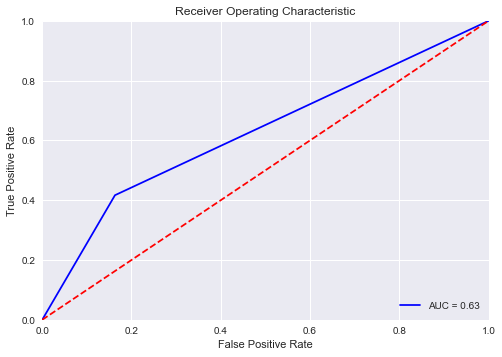

In [67]:
# calculate the fpr and tpr for all thresholds of the classification

probs = treemodel.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

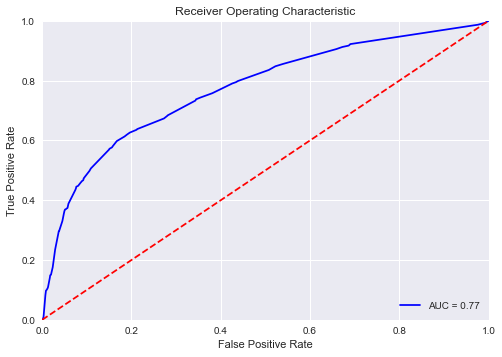

In [69]:
# calculate the fpr and tpr for all thresholds of the classification

probs = tree_model.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()